In [2]:
## Gitam Phase 1 Hackathon
## K Pranay 3061, A Sai Nikhil 2245, S Satish 4699
## MSC Data Science 'A'
## Model to Combat Cyberbullying.

## Importing required Python libraries and their functions.

import re
import os

import pandas as pd
import numpy as np
import string
from collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the raw data set
raw_data = pd.read_csv('/content/train_E6oV3lV.csv')
data = raw_data.copy()
data.drop(columns=['id'], axis=1, inplace=True)
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [4]:
# Through this we found that how much is normal tweets and how much are of not relevant tweets

print(np.round(data['label'].value_counts()[0]/len(data) * 100, 2), "% are Normal Speech")
print(np.round(data['label'].value_counts()[1]/len(data) * 100, 2), "% are Hate Speech")

92.99 % are Normal Speech
7.01 % are Hate Speech


Text(0.5, 1.0, 'Class Distributions \n 0: Normal      1: Hate')

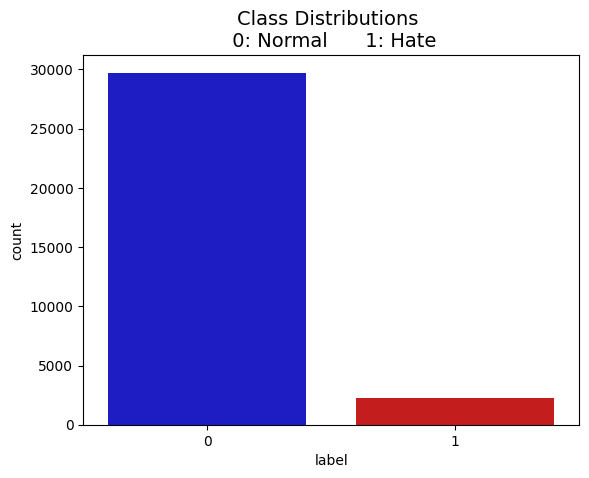

In [9]:
# Plotting it into the graphs

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='label', data=data, palette=colors)
plt.title('Class Distributions \n 0: Normal      1: Hate', fontsize=14)

In [10]:
# Till now we have seen only for texts but emojis are also coming into bullying
# So for that we are now filtering the emojis

def remove_emoji(text):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F" #emoticons
                u"\U0001F300-\U0001F5FF" #symbols & pictograms
                u"\U0001F680-\U0001F6FF" #transport & map symbols
                u"\U0001F1E0-\U0001F1FF" #flags(ios)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr = text1.split()
    text2 = ' '.join([w for w in textArr if(not w.isdigit() and (not w.isdigit() and len(w) > 3))])

    return text2.lower()

In [11]:
# now we are removing emoji and removing test from our library
smptw = '@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why'
smptw = remove_emoji(smptw)
smptw = clean_text(smptw)
print(smptw)

user white supremacists want everyone birdsâ movie hereâs


In [12]:
data['tweet'] = data['tweet'].apply(remove_emoji)
data['tweet'] = data['tweet'].apply(clean_text)
data['num_words_text'] = data['tweet'].apply(lambda x : len(str(x).split()))

train_data, val_data = train_test_split(data, test_size=0.2)
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)

In [13]:
# Now we are training the data set to count the words
test_data = val_data
print("==== Train Data ====")
print(train_data['label'].value_counts())
print(len(train_data))

print("==== Test Data ====")
print(test_data['label'].value_counts())
print(len(test_data))

==== Train Data ====
label
0    23747
1     1822
Name: count, dtype: int64
25569
==== Test Data ====
label
0    5973
1     420
Name: count, dtype: int64
6393


In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['tweet'].tolist(), train_data['label'].tolist(), test_size=0.2, stratify=train_data['label'].tolist(), random_state=0)
print("Train Data len: ", len(X_train))
print("Class distribution: ", Counter(y_train))
print("Validation Data len: ", len(X_valid))
print("Class distribution: ", Counter(y_valid))

Train Data len:  20455
Class distribution:  Counter({0: 18997, 1: 1458})
Validation Data len:  5114
Class distribution:  Counter({0: 4750, 1: 364})


In [15]:
X_train[5]

'having them days today feelingdown'

In [16]:
num_words=50000

tokenizer = Tokenizer(num_words=num_words, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

In [23]:
# Now we are making an array to do the filteration
from keras.preprocessing.sequence import pad_sequences

# Tokenize the sequences
tokenized_train = tokenizer.texts_to_sequences(X_train)
tokenized_valid = tokenizer.texts_to_sequences(X_valid)
tokenized_test = tokenizer.texts_to_sequences(test_data['tweet'].tolist())

# Pad the sequences to the same length
max_len = max(max(len(seq) for seq in tokenized_train),
              max(len(seq) for seq in tokenized_valid),
              max(len(seq) for seq in tokenized_test))

x_train = pad_sequences(tokenized_train, maxlen=max_len)
x_valid = pad_sequences(tokenized_valid, maxlen=max_len)
x_test = pad_sequences(tokenized_test, maxlen=max_len)


train_labels = np.asarray(y_train)
valid_labels = np.asarray(y_valid)
test_labels = np.asarray(test_data['label'].tolist())

print("Train data: ", len(x_train))
print("Validation data: ", len(x_valid))
print("Test data: ", len(x_test))

#Tensorflow dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels))

Train data:  20455
Validation data:  5114
Test data:  6393


In [28]:
# Assuming sequences_train is a list of sequences
maxlen = max(len(seq) for seq in sequences_train)

# Now you can set the sequence_length
sequence_length = maxlen

In [29]:

max_features = 50000
embedding_dim = 16
sequence_length=maxlen

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features + 1, embedding_dim, input_length=sequence_length, embeddings_regularizer=regularizers.l2(0.005)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(embedding_dim, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.005), bias_regularizer=regularizers.l2(0.005)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            800016    
                                                                 
 dropout (Dropout)           (None, 20, 16)            0         
                                                                 
 lstm (LSTM)                 (None, 20, 16)            2112      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 512)               164352    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

In [30]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-3), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [31]:
epochs=100
history=model.fit(train_ds.shuffle(5000).batch(1024), epochs=epochs, validation_data=valid_ds.batch(1024), verbose=1)

Epoch 1/100
20/20 [==============================] - 8s 128ms/step - loss: 2.8830 - binary_accuracy: 0.9083 - val_loss: 1.5054 - val_binary_accuracy: 0.9288
Epoch 2/100
20/20 [==============================] - 2s 105ms/step - loss: 1.0683 - binary_accuracy: 0.9287 - val_loss: 0.6679 - val_binary_accuracy: 0.9288
Epoch 3/100
20/20 [==============================] - 2s 123ms/step - loss: 0.5981 - binary_accuracy: 0.9288 - val_loss: 0.4832 - val_binary_accuracy: 0.9288
Epoch 4/100
20/20 [==============================] - 3s 151ms/step - loss: 0.4875 - binary_accuracy: 0.9287 - val_loss: 0.4267 - val_binary_accuracy: 0.9288
Epoch 5/100
20/20 [==============================] - 2s 109ms/step - loss: 0.4453 - binary_accuracy: 0.9287 - val_loss: 0.3957 - val_binary_accuracy: 0.9288
Epoch 6/100
20/20 [==============================] - 2s 114ms/step - loss: 0.4191 - binary_accuracy: 0.9287 - val_loss: 0.3735 - val_binary_accuracy: 0.9288
Epoch 7/100
20/20 [==============================] - 2s 11

In [32]:
predictions = model.predict(x_test)
print(predictions)

200/200 [==============================] - 1s 5ms/step
[[1.1709050e-07]
 [3.1142645e-13]
 [1.0686236e-12]
 ...
 [2.5619832e-07]
 [2.7241500e-09]
 [1.2160532e-02]]


In [33]:
def display_training_curves(training, validation, title, subplot):
    _, ax = plt.subplots(figsize=(10,5), facecolor='#F0F0F0')
    plt.tight_layout()
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epochs')
    ax.legend(['train', 'valid.'])

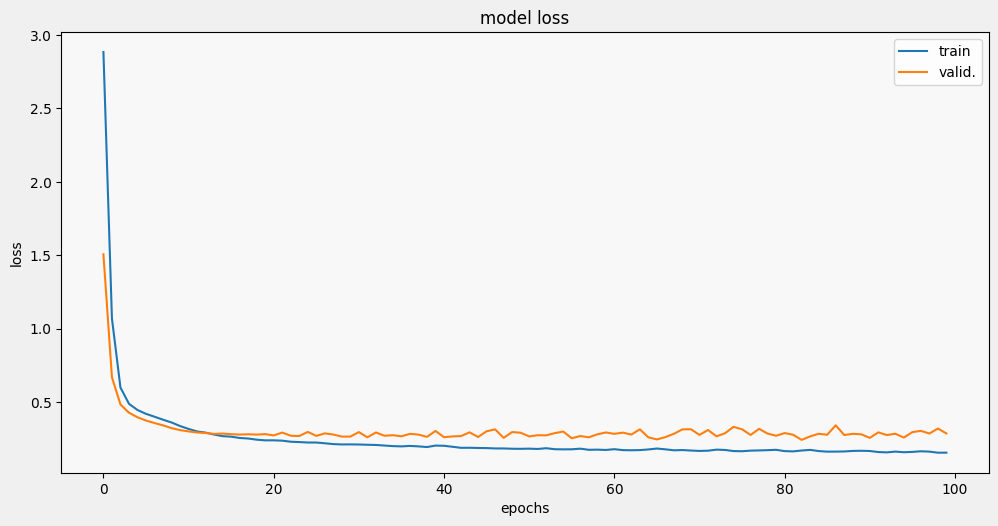

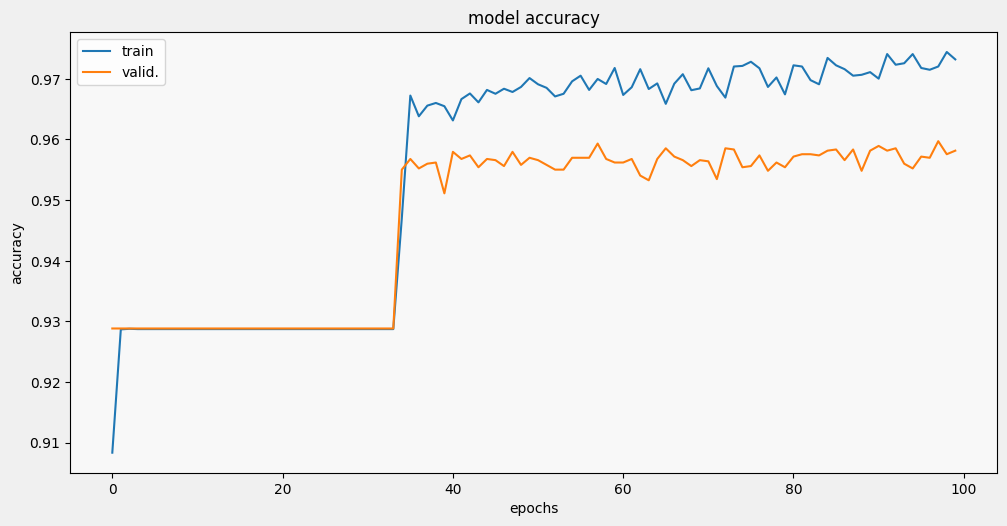

In [34]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss', 211)
display_training_curves(
    history.history['binary_accuracy'],
    history.history['val_binary_accuracy'],
    'accuracy', 212)

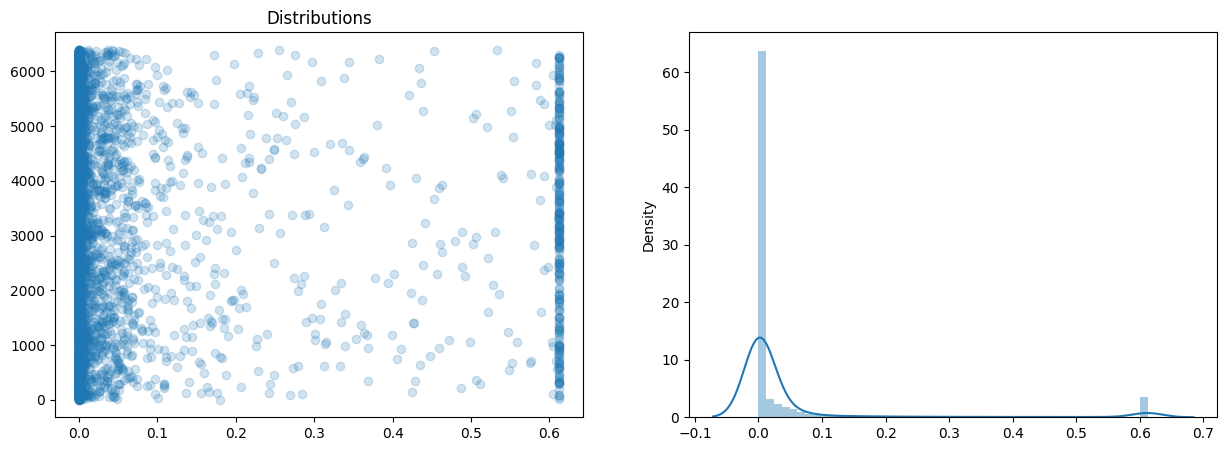

In [35]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(predictions, range(0, len(predictions)), alpha=0.2)
ax1.set_title("Distributions")
ax2 = sns.distplot(predictions)

In [38]:
final_test_df = pd.read_csv('/content/test_tweets_anuFYb8.csv')
ftest = final_test_df.copy()
ftest.drop(columns=['id'], axis=1, inplace=True)

ftest['tweet'] = ftest['tweet'].apply(remove_emoji)
ftest['tweet'] = ftest['tweet'].apply(clean_text)

# Convert the list of lists to a NumPy array with object dtype to handle varying lengths
f_test = np.array(tokenizer.texts_to_sequences(ftest['tweet'].tolist()), dtype=object)

# Pad the sequences after converting to a NumPy array
f_test = pad_sequences(f_test, padding='post', maxlen=maxlen)

display(f_test)

array([[14136,     1,  9280, ...,     0,     0,     0],
       [    2,   186,     1, ...,     0,     0,     0],
       [  496,   666,   519, ...,     0,     0,     0],
       ...,
       [  749,     1,    17, ...,     0,     0,     0],
       [    9,    32,   290, ...,     0,     0,     0],
       [  307,   644,   121, ...,     0,     0,     0]], dtype=int32)

In [39]:
predictions_f_test = model.predict(f_test)

538/538 [==============================] - 2s 4ms/step


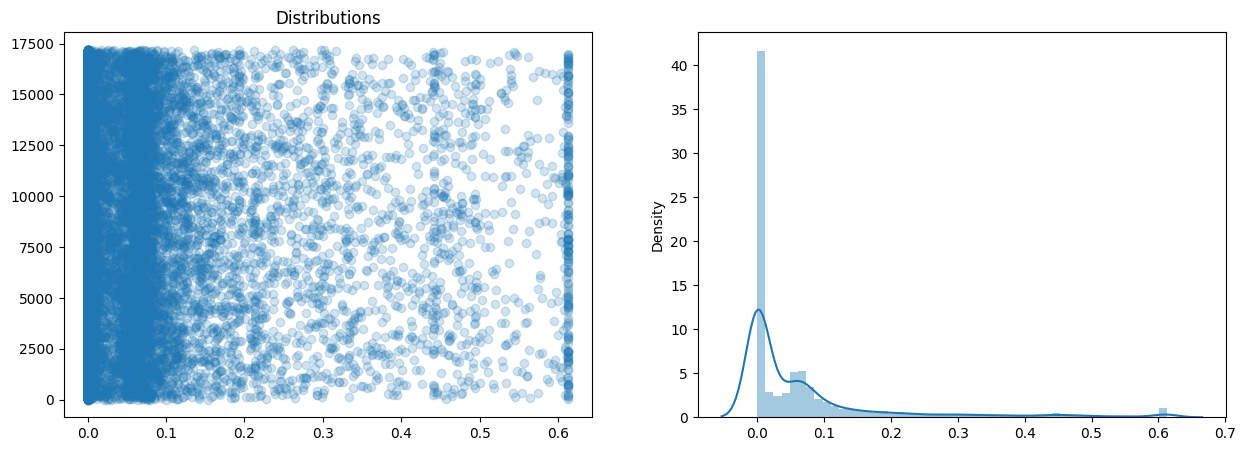

In [40]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(predictions_f_test, ftest.index, alpha=0.2)
ax1.set_title("Distributions")
ax2 = sns.distplot(predictions_f_test)

In [ ]:
!pip3 freeze > requirements.txt